# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Evaluación de modelos de regresión

In [4]:
# Cargar dataset
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

# Cargar el conjunto de datos de Boston desde fetch_openml
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
features = boston.feature_names

X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [5]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos para verificar
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train, y_train): (404, 13) (404,)
Tamaño del conjunto de prueba (X_test, y_test): (102, 13) (102,)


## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Train/Test
y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

# Modelo Train
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Modelo Test
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Crear un DataFrame con los resultados
results_r2 = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'R^2': [train_r2, test_r2]
})

results_mse = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'MSE': [train_mse, test_mse]
})

results_mae = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'MAE': [train_mae, test_mae]
})

## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [12]:
print(results_r2)

    Dataset       R^2
0  Training  0.750886
1   Testing  0.668759


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [13]:
print(results_mse)

    Dataset        MSE
0  Training  21.641413
1   Testing  24.291119


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [14]:
print(results_mae)

    Dataset       MAE
0  Training  3.314772
1   Testing  3.189092


## Evaluación del modelo de clasificación

In [20]:
from sklearn.datasets import load_iris
df = load_iris()

In [23]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [51]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
X = pd.DataFrame(df["data"], columns=df["feature_names"])
y = pd.DataFrame(df["target"], columns=["class"])

df = pd.concat([X, y], axis=1)

## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [25]:
#! pip install plotly

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 800x800 with 0 Axes>

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LR modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediccion en Train con LR
y_train_pred = model.predict(X_train)

# Prediccion en Test con LR
y_test_pred = model.predict(X_test)

## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

In [34]:
import pandas as pd
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Métricas Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')  # Cambiar a 'weighted'
train_recall = recall_score(y_train, y_train_pred, average='weighted')        # Cambiar a 'weighted'
train_f1 = f1_score(y_train, y_train_pred, average='weighted')                # Cambiar a 'weighted'
train_cm = confusion_matrix(y_train, y_train_pred)

# Métricas Test
test_accuracy = accuracy_score(y_test, y_test_pred) 
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')      # Cambiar a 'weighted'
test_recall = recall_score(y_test, y_test_pred, average='weighted')            # Cambiar a 'weighted'
test_f1 = f1_score(y_test, y_test_pred, average='weighted')                    # Cambiar a 'weighted'
test_cm = confusion_matrix(y_test, y_test_pred)

# DataFrame Resultados
results = pd.DataFrame({
    'Métrica': [
        'Accuracy',
        'Balanced Accuracy',
        'Precision',
        'Recall',
        'F1 Score'
    ],
    'Train': [
        train_accuracy,
        train_balanced_accuracy,
        train_precision,
        train_recall,
        train_f1
    ],
    'Test': [
        test_accuracy, 
        test_balanced_accuracy,
        test_precision,
        test_recall,
        test_f1
    ]
})


In [29]:
results

,Métrica,Train,Test
0,Accuracy,0.975000,1.0
1,Balanced Accuracy,0.975610,1.0
2,Precision,0.976786,1.0
3,Recall,0.975000,1.0
4,F1 Score,0.974988,1.0


## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [ ]:
# Your code here

## 10. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 11. Calcule e imprima la puntuación de recuerdo tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

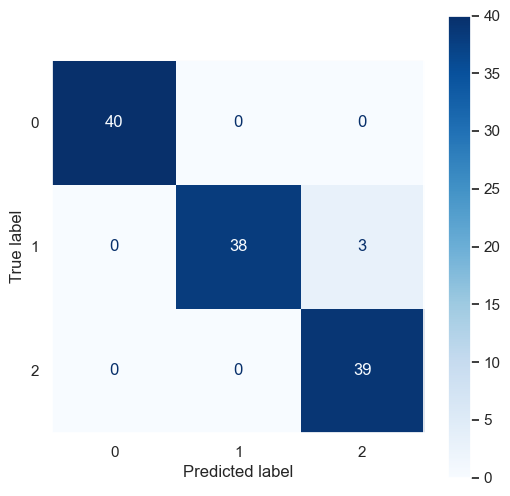

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#train_cm
disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

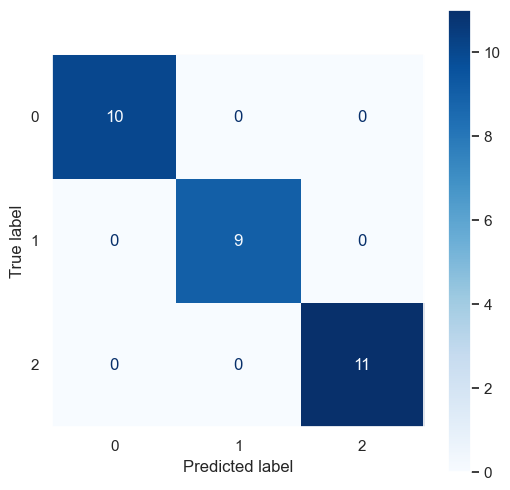

In [36]:
#test_cm
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

### IRIS

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

In [40]:
#Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Guardar resultados
results = []

# Entrenar models
for model_name, model in models.items():

    # Train models
    model.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculo métricas
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    results.append(metrics)

# DataFrame Results
results_df = pd.DataFrame(results)


In [41]:
results_df 

,Model,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.975000,1.0,0.975610,1.0,0.976786,1.0,0.975000,1.0,0.974988,1.0
1,Decision Tree,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
2,Random Forest,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
3,Support Vector Machine,0.975000,1.0,0.975193,1.0,0.975208,1.0,0.975000,1.0,0.975004,1.0
4,K-Nearest Neighbors,0.966667,1.0,0.967063,1.0,0.967459,1.0,0.966667,1.0,0.966667,1.0


Mejores Modelos: Logistic Regression o Support Vector Machine al tener menor sobreajuste.


### BOSTON

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el conjunto de datos de Boston desde fetch_openml
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
features = boston.feature_names

X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Almacenar resultados
results = []

# Entrenar cada modelo y calcular métricas
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas TRAIN
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
    train_r2 = r2_score(y_train, y_train_pred)

    # Calcular métricas TEST
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE
    test_r2 = r2_score(y_test, y_test_pred)

    # Resultados
    metrics = {
        'Model': model_name,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }
    results.append(metrics)

# Crear un DataFrame para mostrar los resultados
results_df_all = pd.DataFrame(results)



In [54]:
results_df_all

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear Regression,3.314772,3.189092,21.641413,24.291119,4.652033,4.928602,0.750886,0.668759
1,Decision Tree,0.000000,2.537255,0.000000,11.597843,0.000000,3.405561,1.000000,0.841849
2,Random Forest,0.859745,2.015412,1.703783,7.761730,1.305290,2.785988,0.980388,0.894159
3,Support Vector Regression,5.494752,4.530586,70.771497,52.838366,8.412580,7.269000,0.185349,0.279481
4,K-Nearest Neighbors,3.608416,3.663922,27.458911,25.860125,5.240125,5.085285,0.683920,0.647364


Mejor Modelo: Random Forest, el q tiene el R2 más alto.
2º mejor modelo: Decision Tree, tiene valores MAE, MSE, RMSE demasiado perfectos.. sobreajuste